In [1]:
import datetime
import matplotlib as mpl
import backtrader as bt
%matplotlib inline

import pandas_datareader as pdr

import requests_cache
session = requests_cache.CachedSession(cache_name='stocks-cache', backend='sqlite')

nvda_df = pdr.DataReader('NVDA', start='1999-01-22', end='2020-05-01', data_source='yahoo', session=session)
nvda_df = nvda_df[nvda_df.index >= '2014-01-01']

<IPython.core.display.Javascript object>


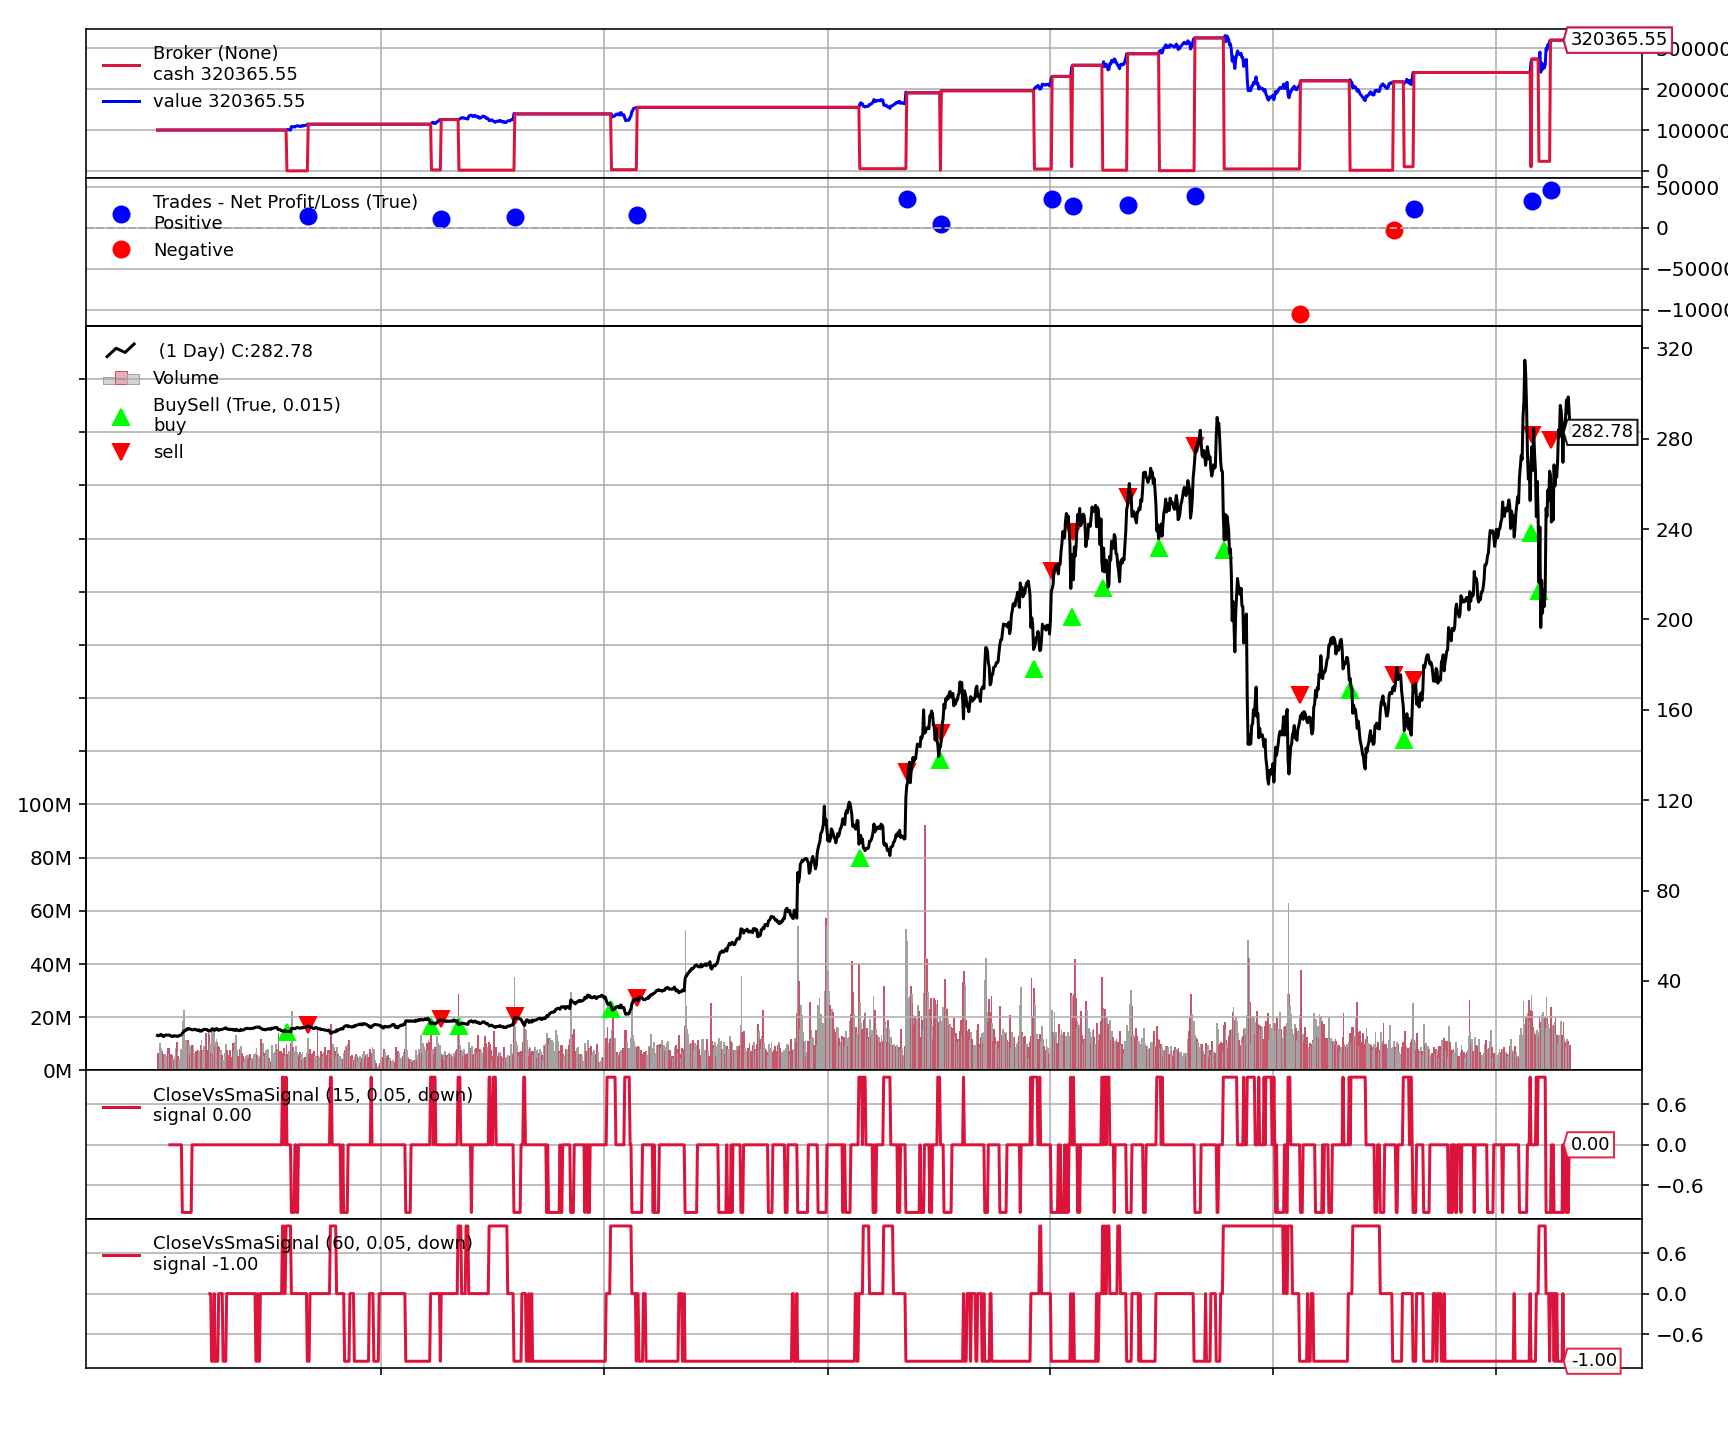

In [3]:
from baselines import close_vs_sma_strategy

cerebro = close_vs_sma_strategy()
cerebro.broker.setcash(100000.0)

data = bt.feeds.PandasData(dataname=nvda_df)
cerebro.adddata(data)

cerebro.run()

mpl.rc("figure", figsize=(12, 10))
cerebro.plot();

<IPython.core.display.Javascript object>


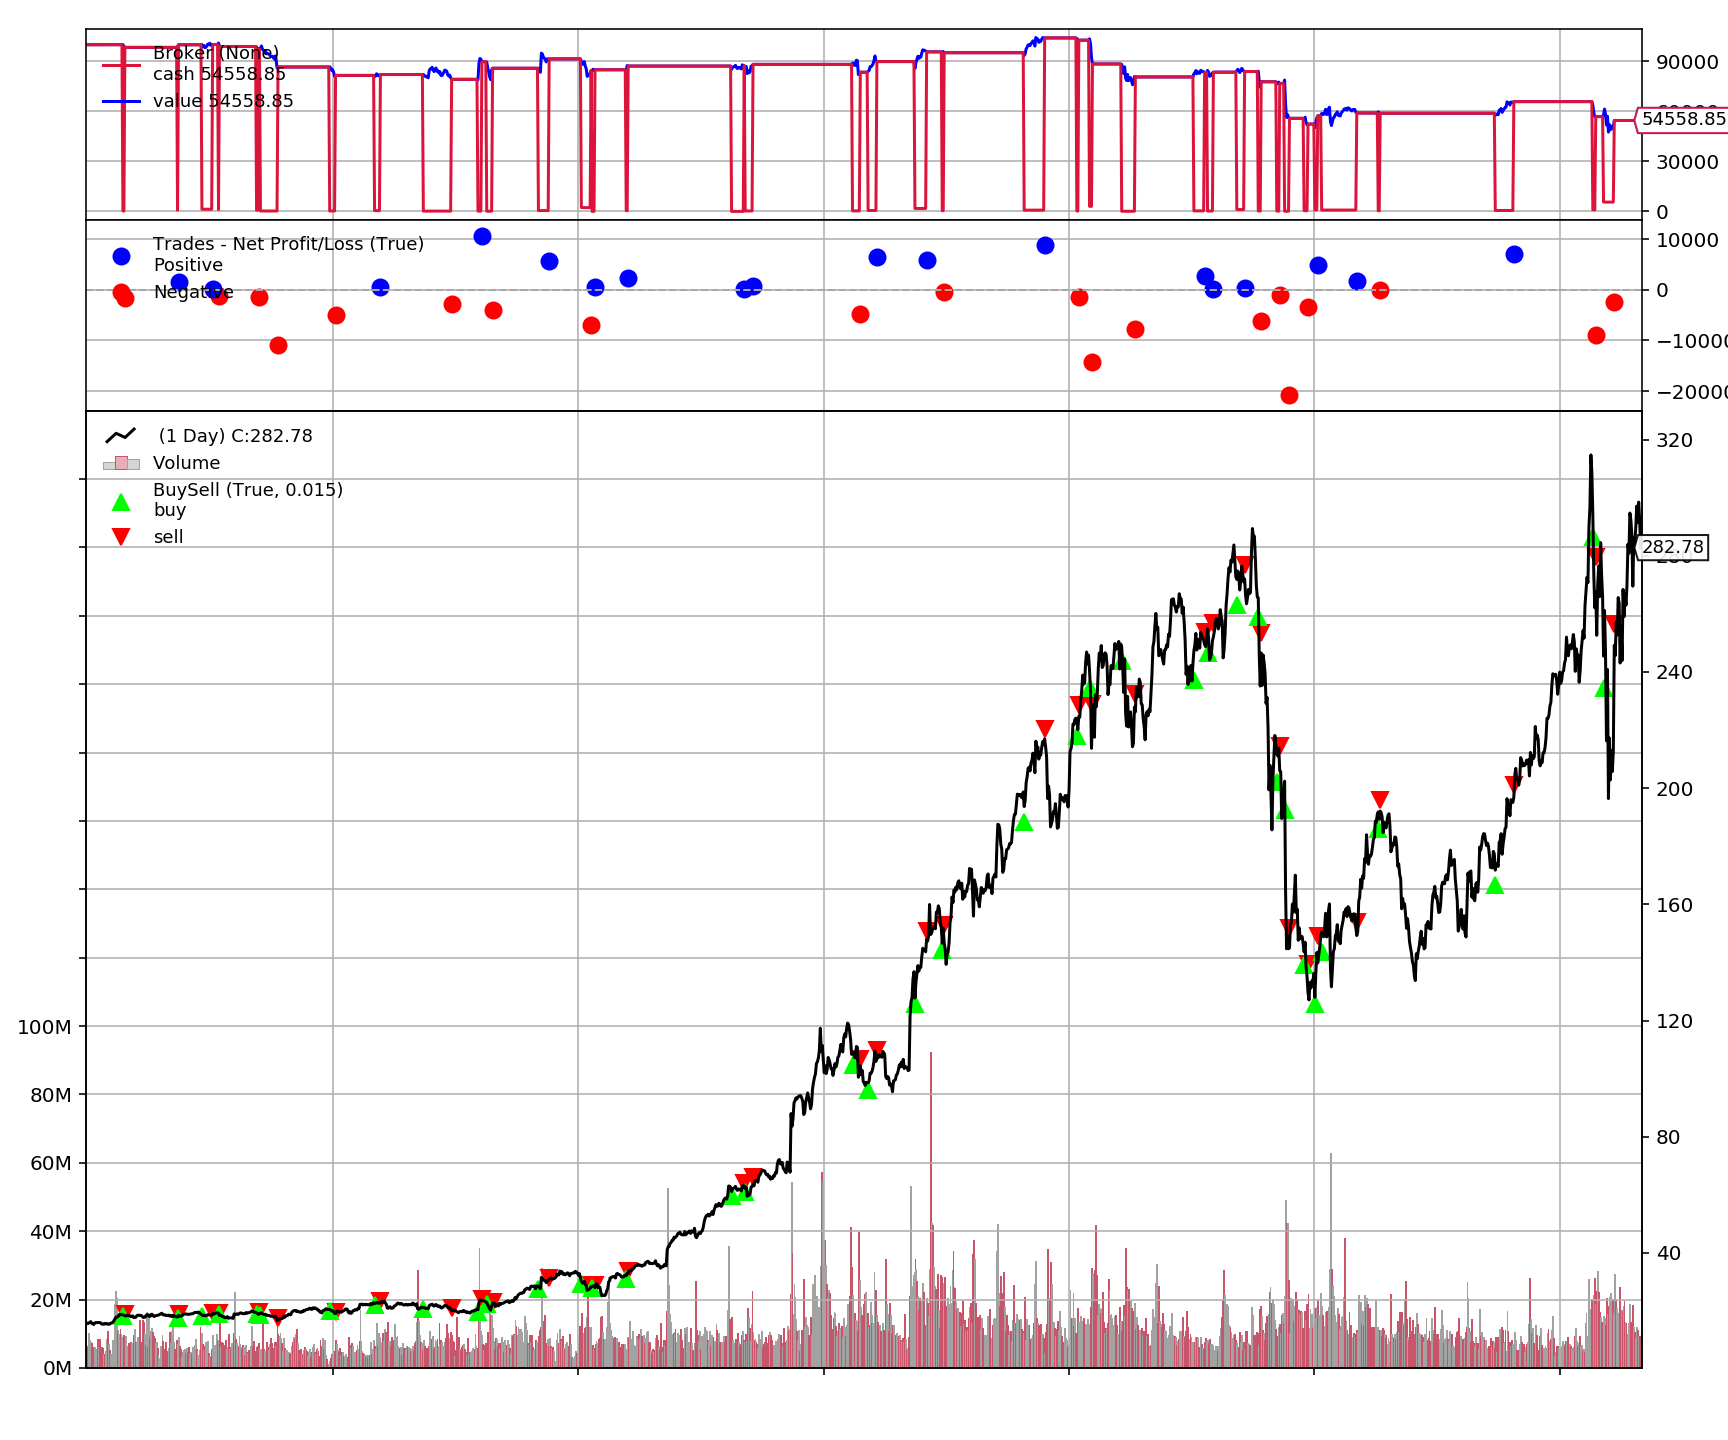

In [3]:
from baselines import random_strategy

cerebro = random_strategy()
cerebro.broker.setcash(100000.0)

data = bt.feeds.PandasData(dataname=nvda_df)
cerebro.adddata(data)

cerebro.run()

mpl.rc("figure", figsize=(12, 10))
cerebro.plot();

<IPython.core.display.Javascript object>


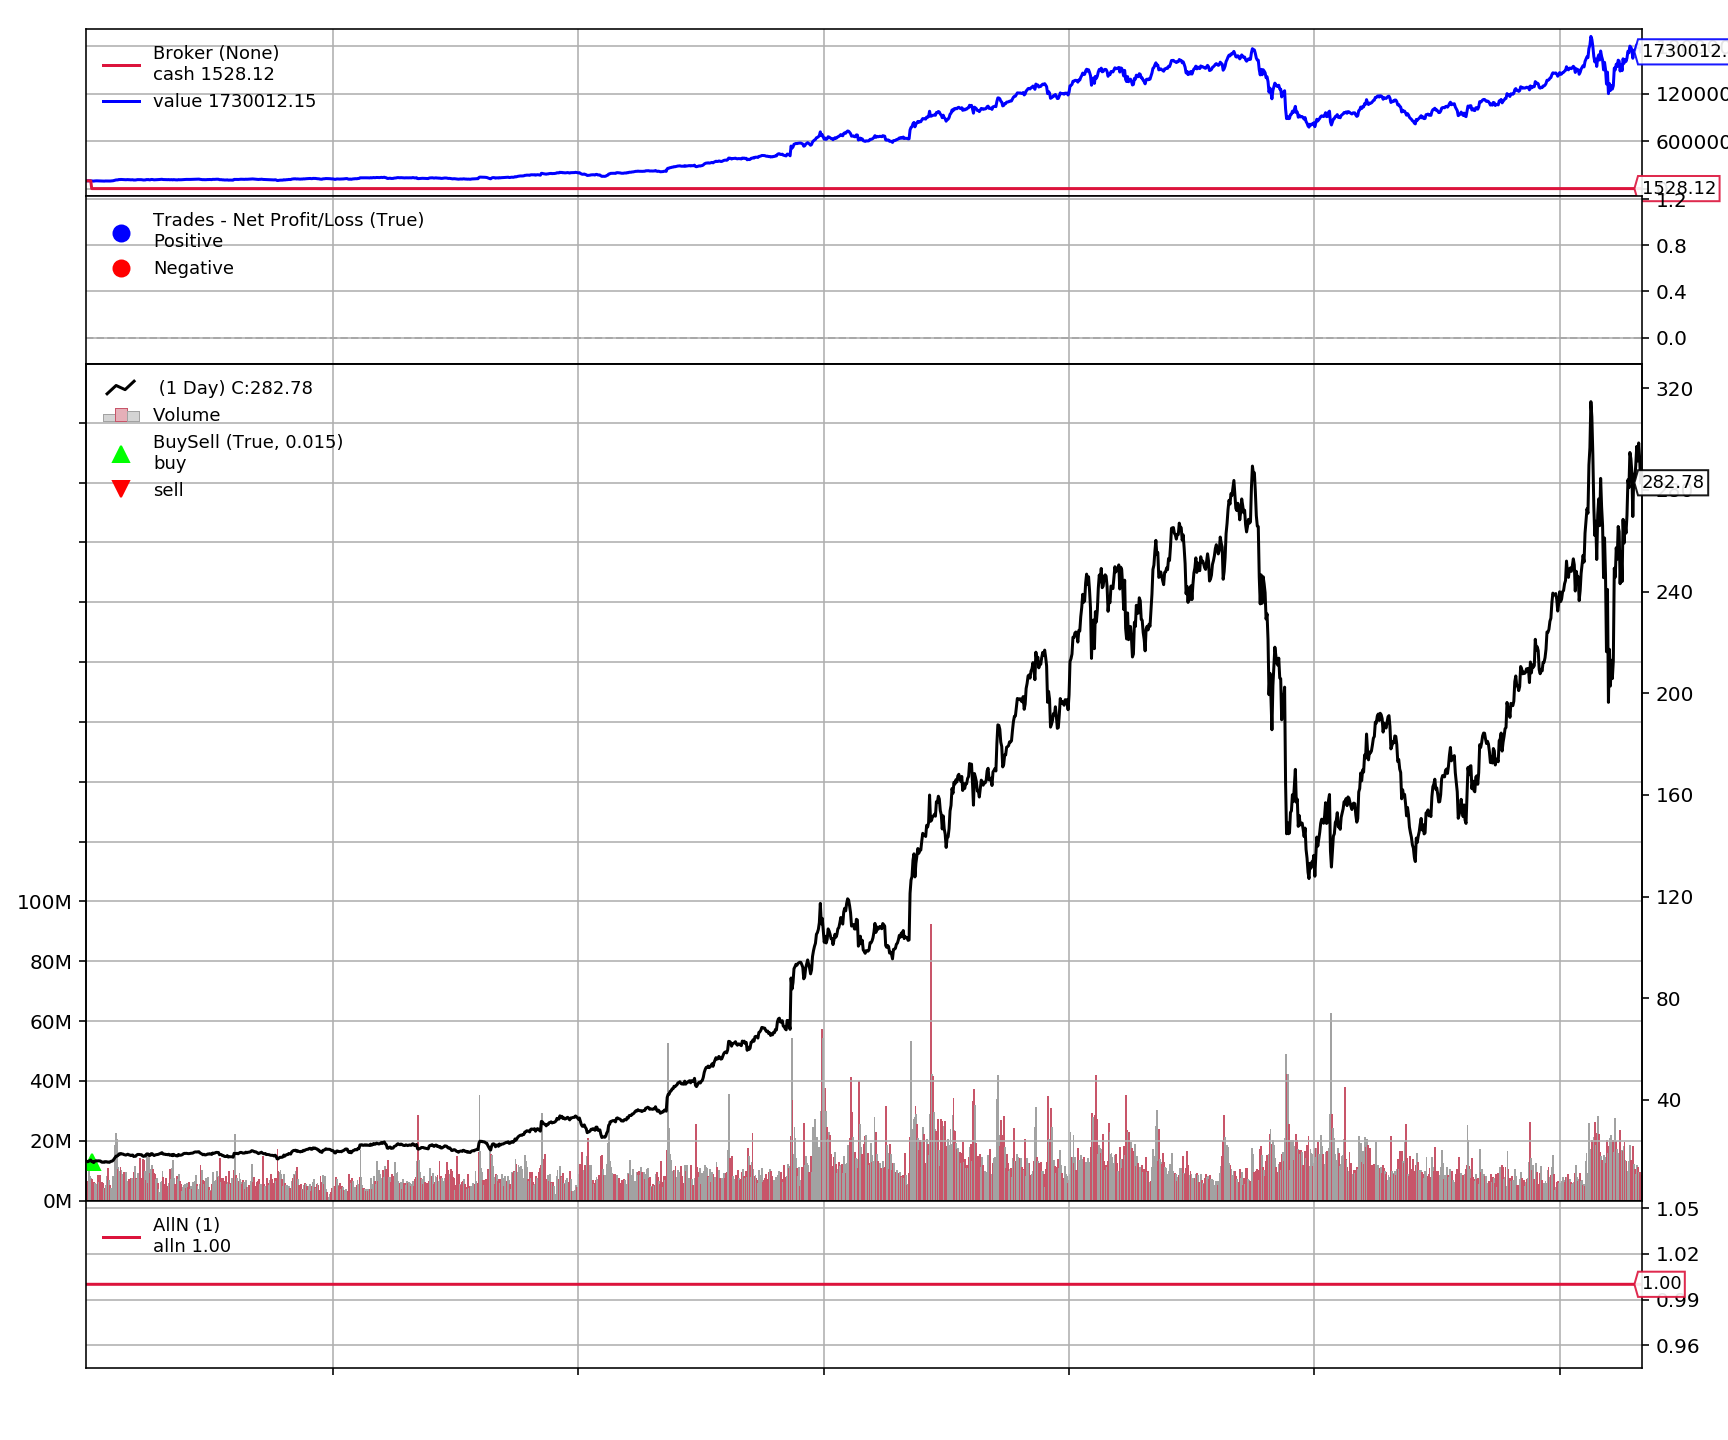

In [2]:
from baselines import buy_and_hold_strategy

cerebro = buy_and_hold_strategy()
cerebro.broker.setcash(100000.0)

data = bt.feeds.PandasData(dataname=nvda_df)
cerebro.adddata(data)

cerebro.run()

mpl.rc("figure", figsize=(12, 10))
cerebro.plot();

<IPython.core.display.Javascript object>


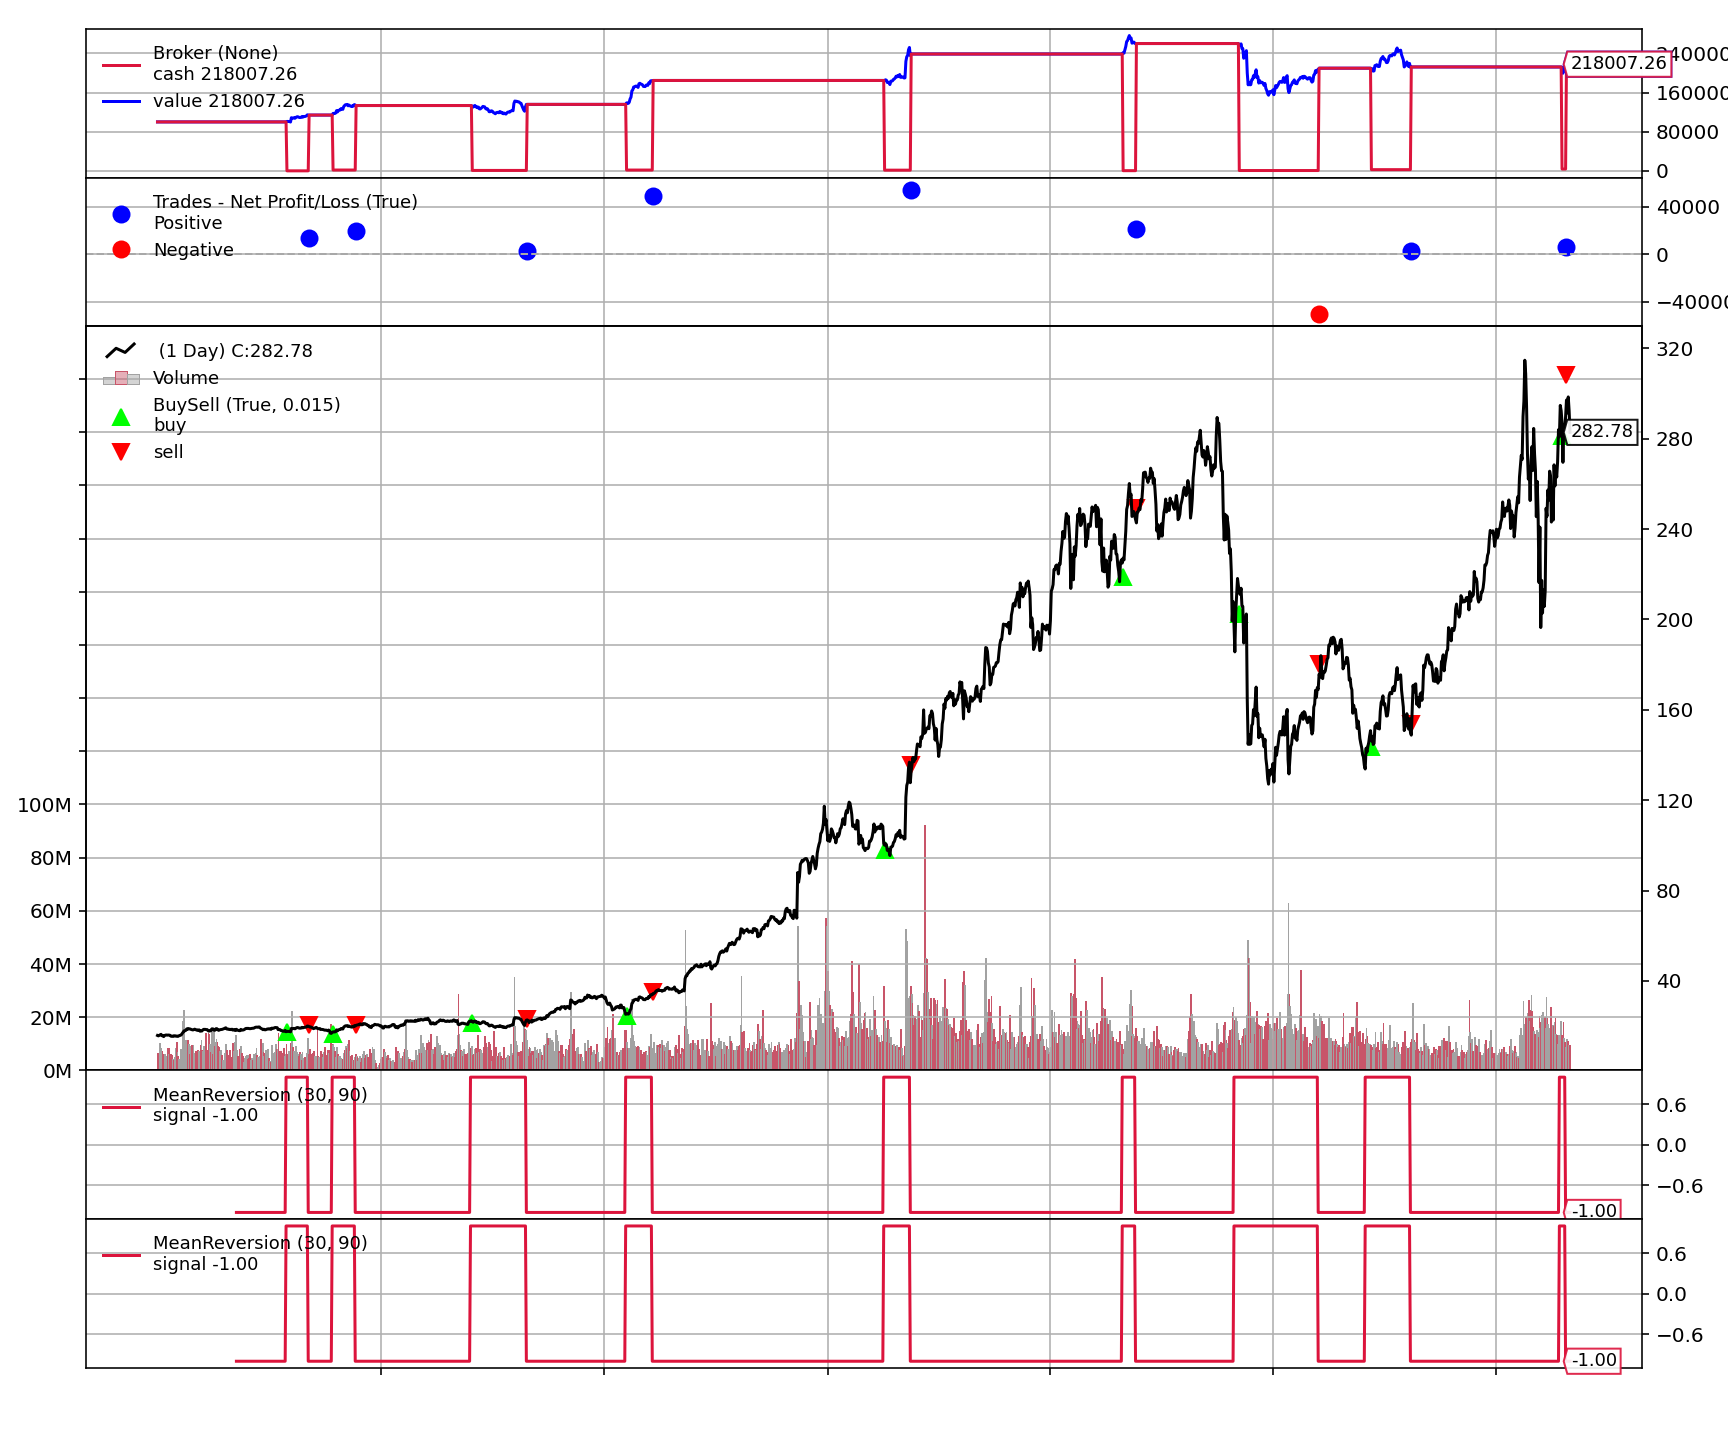

In [2]:
from baselines import mean_reversion_strategy

cerebro = mean_reversion_strategy()
cerebro.broker.setcash(100000.0)

data = bt.feeds.PandasData(dataname=nvda_df)
cerebro.adddata(data)

cerebro.run()

mpl.rc("figure", figsize=(12, 10))
cerebro.plot();

<IPython.core.display.Javascript object>


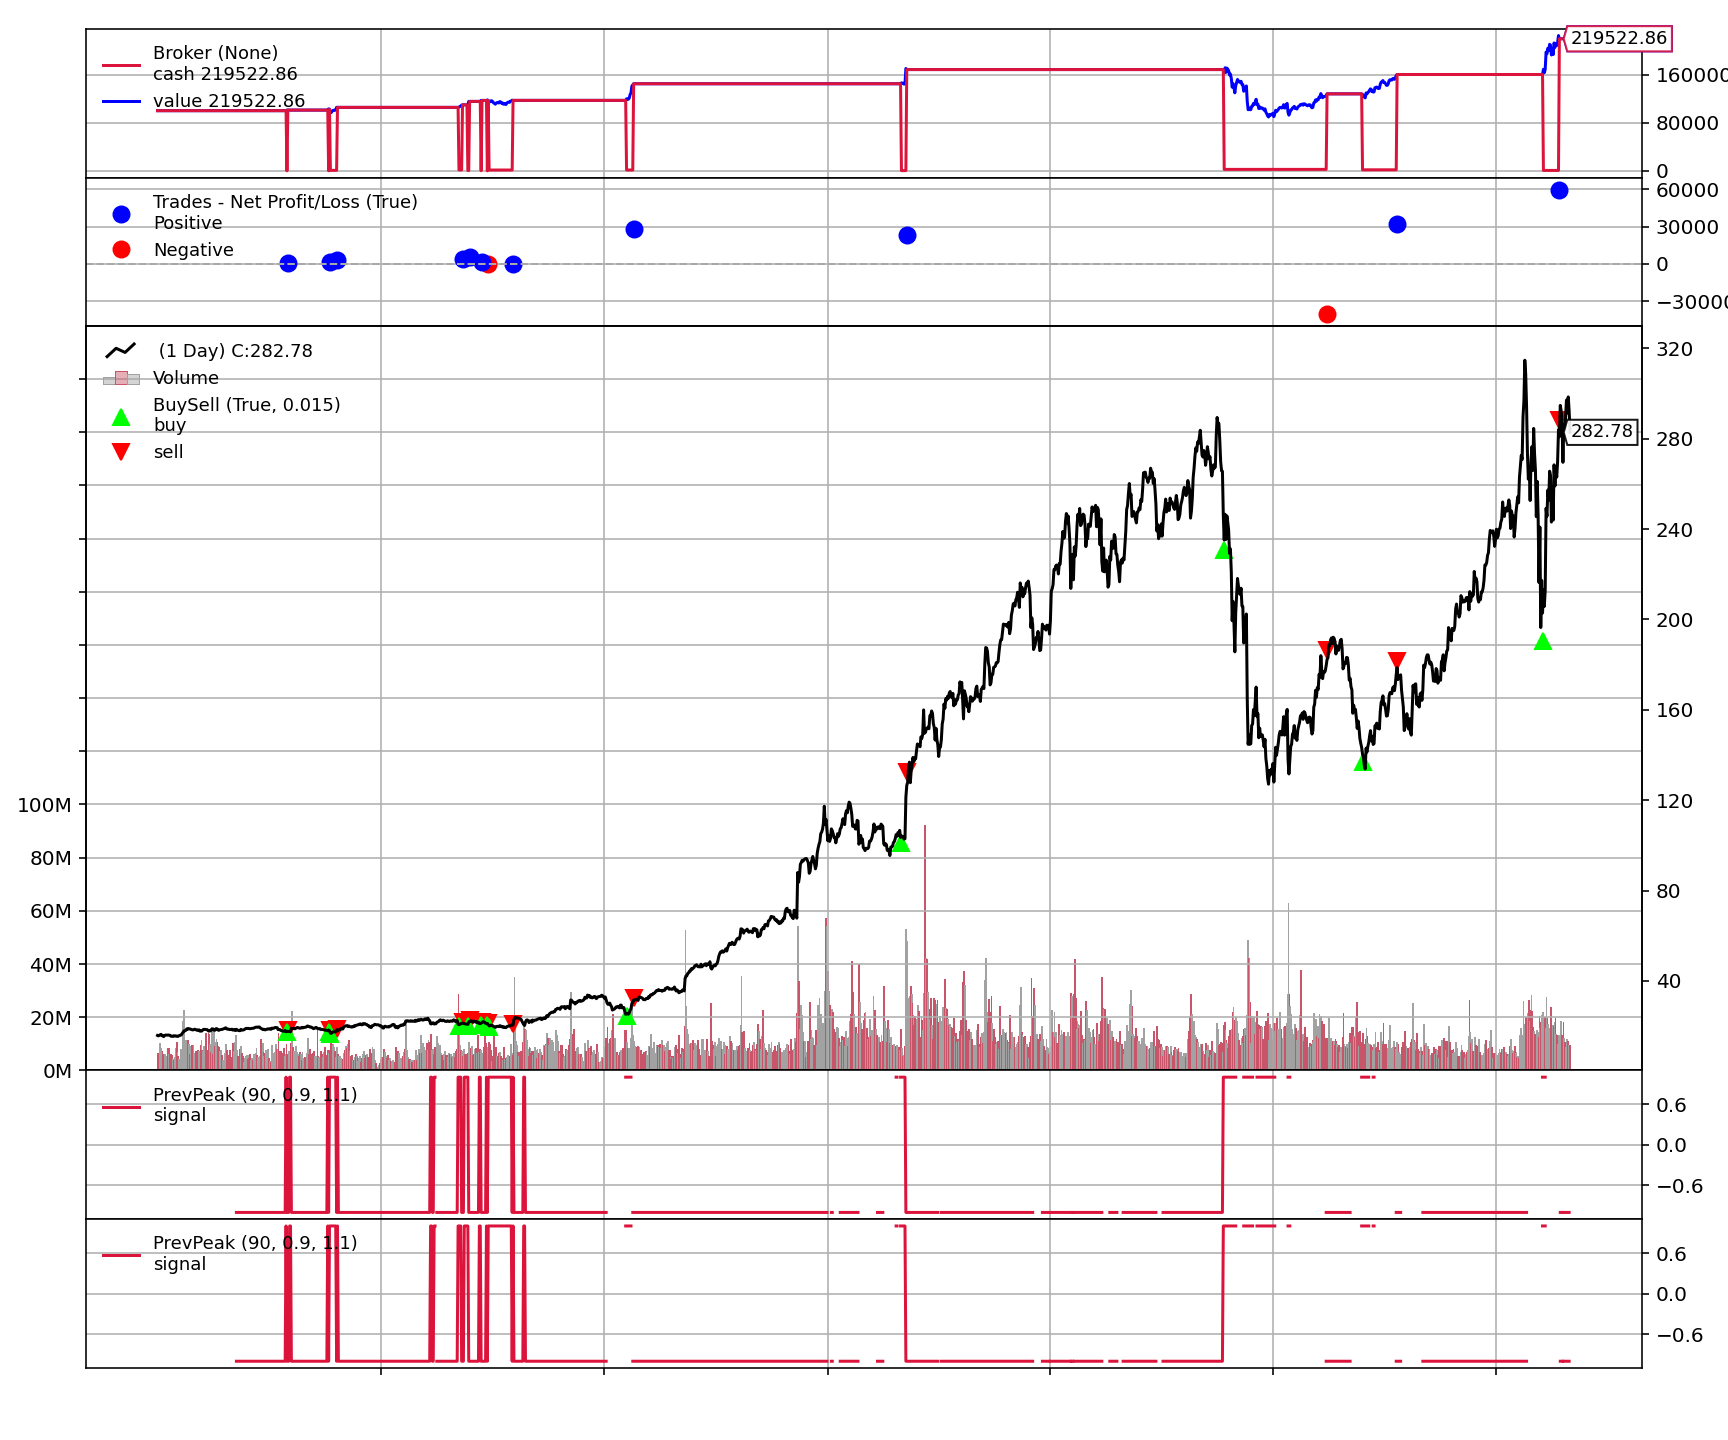

In [2]:
from baselines import prev_peak_strategy

cerebro = prev_peak_strategy()
cerebro.broker.setcash(100000.0)

data = bt.feeds.PandasData(dataname=nvda_df)
cerebro.adddata(data)

cerebro.run()

mpl.rc("figure", figsize=(12, 10))
cerebro.plot();